# 회귀연습문제

## 키와 몸무게의 지표 확인(data split 없이 진행)

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
df = pd.read_csv('키와몸무게.csv',encoding='cp949')

In [ ]:
ch_df = df.copy()

# 파운드로 적혀 있는 무게 값을 KG 단위로 변환합니다.
ch_df['ch_Weight'] = ch_df['Weight'] * 0.45359237

# inch로 적혀 있는 키 값을 cm 단위로 변환합니다.
ch_df['ch_Height'] = ch_df['Height'] * 2.54

ch_df

,Gender,Height,Weight,ch_Weight,ch_Height
0,Male,73.847017,241.893563,109.721075,187.571423
1,Male,68.781904,162.310473,73.622792,174.706036
2,Male,74.110105,212.740856,96.497629,188.239668
3,Male,71.730978,220.042470,99.809586,182.196685
4,Male,69.881796,206.349801,93.598695,177.499761
...,...,...,...,...,...
9995,Female,66.172652,136.777454,62.041210,168.078536
9996,Female,67.067155,170.867906,77.504378,170.350573
9997,Female,63.867992,128.475319,58.275424,162.224700
9998,Female,69.034243,163.852461,74.322226,175.346978


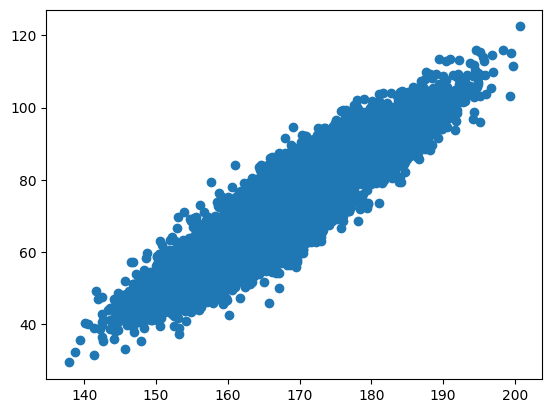

In [ ]:
# 키와 몸무게에 관한 산점도를 그렵봅니다.
# 산점도가 직선의 방향성을 지니고 있을 때, 선형회귀를 사용합니다.
import matplotlib.pyplot as plt

몸무게 = ch_df['ch_Weight']
키 = ch_df['ch_Height']
plt.plot(키, 몸무게, 'o')
plt.show()

In [ ]:
# 선형회귀 모델을 통한 학습을 진행합니다.
from sklearn.linear_model import LinearRegression

data = ch_df[['ch_Height']]
target = ch_df['ch_Weight']

lr = LinearRegression()

lr.fit(data, target)

# 학습한 내용을 바탕으로 예측합니다.
lr.predict([[170]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.19390579])

In [ ]:
# 회귀식의 기울기와 절편을 구합니다
# 기울기 : coef_,  절편 : intercept_
print(lr.coef_, lr.intercept_)

[1.37815071] -159.09171408121202


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


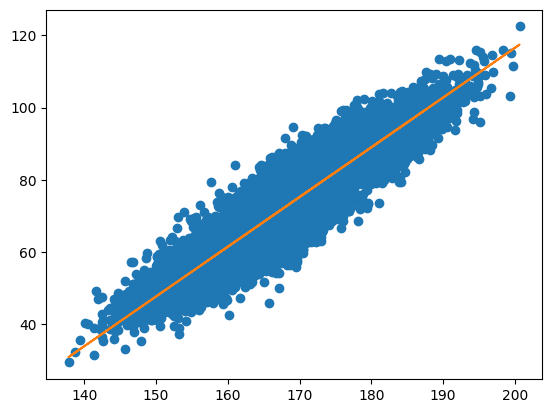

In [ ]:
# 예측값 그래프 그리기
plt.plot(키, 몸무게, 'o')
plt.plot(키,lr.predict(키.values.reshape(-1,1)))
plt.show()

## data split을 통한 모델 검증

In [ ]:
#case 2: 훈련용 데이터셋과 테스트용 데이터셋 나누어서 분석
from sklearn.model_selection import train_test_split

data = ch_df[['ch_Height']]
target = ch_df['ch_Weight']

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [ ]:
# 선형회귀모델 학습

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

# [170] 데이터 넣어서 예측값 확인하기
lr.predict([[170]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.20735793])

In [ ]:
# score 확인
lr.score(X_test, y_test)

0.8492011562003081

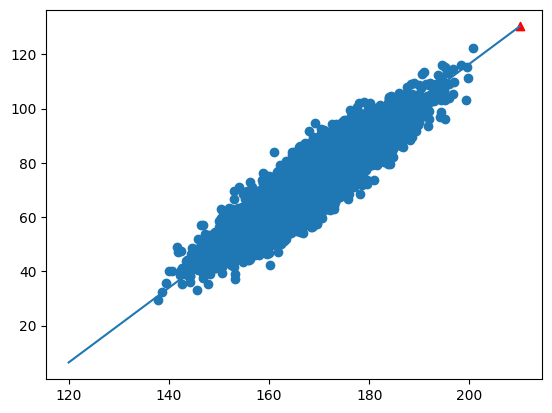

In [ ]:
# 예측 그래프 그리기
import matplotlib.pyplot as plt
plt.scatter(X_train , y_train)
plt.plot( [120,210], [120*lr.coef_ +lr.intercept_ ,
                    210*lr.coef_ + lr.intercept_])
plt.scatter(210 , 210*lr.coef_ + lr.intercept_ ,marker="^",color="red")
plt.show()

# 로지스틱회귀분석

In [ ]:
#Step 1.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
import pandas as pd
study = pd.read_csv('공부시간과시험합격.csv',encoding='cp949')

In [ ]:
study.head()

,이름,공부시간,시험점수,합격여부
0,이원재,15.0,85.0,합격
1,맹승주,14.5,86.5,합격
2,안미경,14.0,86.0,합격
3,서진수,13.5,85.5,합격
4,황경인,13.0,85.0,합격


In [ ]:
from sklearn.model_selection import train_test_split

data = study[['공부시간']]
target = study['합격여부']

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

print(X_test)
print(lr.predict(X_test))

    공부시간
21   8.0
0   15.0
4   13.0
10  10.5
1   14.5
17   8.5
18   8.5
['불합격' '합격' '합격' '합격' '합격' '불합격' '불합격']


In [ ]:
import numpy as np

print(np.round(lr.predict_proba(X_test),3))

[[0.952 0.048]
 [0.    1.   ]
 [0.004 0.996]
 [0.23  0.77 ]
 [0.    1.   ]
 [0.896 0.104]
 [0.896 0.104]]


In [ ]:
import pandas as pd
fruit_2 = pd.read_csv('과일채소목록_2.csv',encoding='cp949')
fruit_2.head()

,종류,무게_g,길이_cm,당도,등급
0,거봉포도,291,29.1,9.1,A
1,거봉포도,290,29.0,9.0,A
2,거봉포도,281,28.1,8.1,B
3,거봉포도,280,28.0,8.0,B
4,거봉포도,271,26.1,8.6,B


In [ ]:
from sklearn.model_selection import train_test_split

data2 = fruit_2[['무게_g', '길이_cm','당도']]
target2 = fruit_2['종류']

X_train, X_test, y_train, y_test = train_test_split(data2, target2, test_size = 0.2, random_state = 40)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(X_train, y_train)

st_X_train = ss.transform(X_train)
st_X_test = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

softmax_reg = LogisticRegression(C=5, max_iter=200)
softmax_reg.fit(st_X_train, y_train)

print(softmax_reg.predict(st_X_test))

print(np.round(softmax_reg.predict_proba(st_X_test),3))

print(softmax_reg.score(st_X_test, y_test))

['자두' '옥수수' '참외' '자두' '참외' '거봉포도' '수박' '거봉포도' '수박' '거봉포도']
[[0.003 0.001 0.003 0.823 0.17 ]
 [0.004 0.001 0.991 0.    0.004]
 [0.013 0.012 0.027 0.304 0.644]
 [0.003 0.    0.001 0.866 0.13 ]
 [0.031 0.023 0.013 0.181 0.752]
 [0.989 0.006 0.001 0.    0.004]
 [0.011 0.796 0.001 0.    0.191]
 [0.974 0.01  0.003 0.    0.012]
 [0.    0.998 0.    0.    0.002]
 [0.979 0.009 0.005 0.    0.007]]
1.0


# KNN 수박 참외 맞추기

In [ ]:
src_data = pd.read_csv('수박과참외.csv',
                       encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,900,10.0
5,수박,2500,33.0
6,수박,2250,23.0
7,수박,1860,17.0
8,수박,2100,21.0
9,수박,1500,17.0


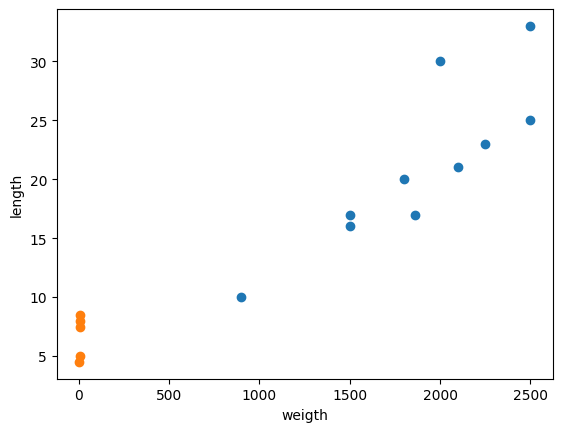

In [ ]:
#수박과 참외의 무게와 길이
수박정보 = src_data.loc[ (src_data['종류'] =='수박'), ['무게','길이']]
참외정보 = src_data.loc[ (src_data['종류'] =='참외'), ['무게','길이']]

import matplotlib.pyplot as plt
plt.scatter(수박정보.무게,수박정보.길이)
plt.scatter(참외정보.길이,참외정보.길이)
plt.xlabel('weigth')
plt.ylabel('length')
plt.show()

In [ ]:
import numpy as np

# np.column_stack을 통해 무게와 길이를 data 변수에 넣는다.
data = src_data[['무게','길이']]

# 데이터의 종류를 target에 넣는다.
target = src_data['종류']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.25,random_state=40)

In [ ]:
print(X_train.shape, X_test.shape)

(11, 2) (4, 2)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.25

In [ ]:
# Step 6. 모델이 정확한지 임의의 데이터로 테스트합니다.
print( knn.predict([[1000, 15]]))

['수박']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


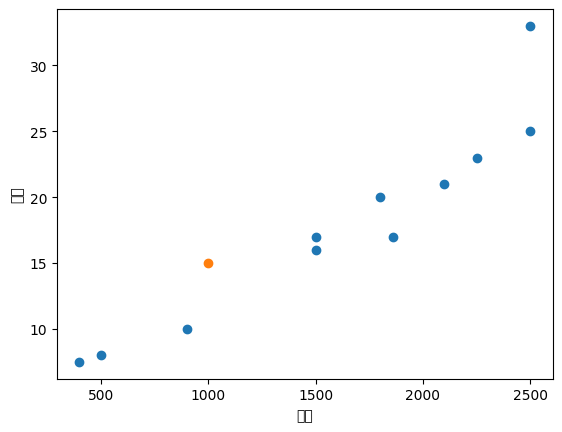

In [ ]:
# Step 7. 위 데이터의 값을 그래프로 출력하여 확인합니다.
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1])
plt.scatter(1000, 15, marker='o')
plt.xlabel('무게')
plt.ylabel('길이')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/loc

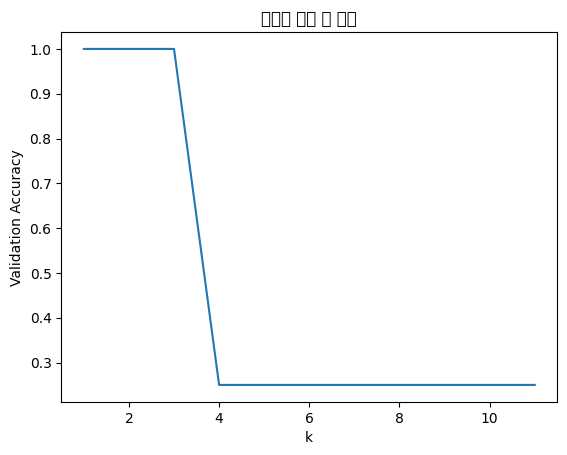

In [ ]:
# Step 8. 최적의 k 값 찾기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

k_list = range(1,12)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train.values.ravel())
  accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("최적의 이웃 값 찾기")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

1.0